The **ReAct Agent Architecture** is a powerful pattern used to build more intelligent AI agents. **ReAct** stands for **Reasoning + Acting**. This architecture allows a model not only to **think** (reason) but also to **do things** (act) using external tools like calculators, APIs, search engines, or custom functions.

---

### ✅ The Aim of ReAct

ReAct enables an AI agent to **interleave reasoning and actions** in steps so it can solve complex problems that require external information or multiple steps of thinking.

It follows a simple loop:

| Step        | Description                                              |
| ----------- | -------------------------------------------------------- |
| **Act**     | The AI decides to call a specific tool or take an action |
| **Observe** | The AI gets back the result/output from the tool         |
| **Reason**  | The AI thinks about what to do next based on the result  |

Then it repeats the cycle until it reaches the final answer.

---

### 🔁 How ReAct Works (Step by Step Example)

Let’s say the agent is asked:

> **"What's the population of France minus the population of Germany?"**

A normal model might hallucinate. But a ReAct agent does this:

1. **Reason** → "I don’t know the populations, I should look them up."
2. **Act** → Calls a `search_population` tool for France.
3. **Observe** → Tool returns: *Population of France = 67 million*.
4. **Reason** → "Next, I need Germany population."
5. **Act** → Calls `search_population` tool for Germany.
6. **Observe** → Tool returns: *Population of Germany = 83 million*.
7. **Reason** → "Now I can subtract."
8. **Act** → Performs subtraction.
9. **Final Answer** → "Germany has 16 million more people than France."

---

### 💡 Why ReAct Is Important

| Benefit                 | Explanation                             |
| ----------------------- | --------------------------------------- |
| Reduces hallucinations  | Because it uses verified tool outputs   |
| Better problem solving  | Breaks tasks into steps                 |
| Real-world capabilities | Can use APIs, databases, calculations   |
| Multi-step workflows    | Decisions improve with each observation |

---

### 🧠 Intuition Behind the Loop

You can think of ReAct as how **humans solve problems**:

> **Think → Do → Check Result → Think Again → Do Next Step → Answer**

That’s exactly what ReAct enables in AI agents.

---

In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

# ARXIV RAPPER

In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [5]:
arxiv.invoke("Attention iss all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

# WIKIPEDIA SEARCH

In [6]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [7]:
wiki.invoke("What is machine learning")

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [8]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"]="ReAct-agent"


# Custom Functions to create Tools

In [9]:
### Custom Functions
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b
# ADDING ALL TOOLS TOGETHER
tools=[arxiv,wiki,add,multiply,divide]

# Tavily Search Tool

In [10]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\Furqan Khan\AppData\Local\Temp\ipykernel_9112\3584238.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [11]:
tavily.invoke("Provide me the recent AI news for october 10 2025")

[{'title': 'Artificial Intelligence News for the Week of October 10',
  'url': 'https://solutionsreview.com/artificial-intelligence-news-for-the-week-of-october-10-updates-from-coreweave-ibm-salesforce-more/',
  'content': 'Logo\nLogo\nLogo\nLogo\nclose icon\nclose icon\nclose icon\nclose icon\n\nAd ImageAd Image\n\nAd ImageAd Image\nAd Image\n\n# Artificial Intelligence News for the Week of October 10; Updates from CoreWeave, IBM, Salesforce & More\n\nTim KingTim King\nTim King\n \n\nSolutions Review Executive Editor Tim King curated this list of notable artificial intelligence news for the week of October 10, 2025. [...] At TechXchange 2025, IBM introduced next-gen software and infrastructure to help companies transition from AI experimentation to true productivity. Highlights include watsonx Orchestrate with AgentOps (agent observability and governance), low-code agent building via Langflow, the Project infragraph unified observability plane, new mainframe AI assistants, and the pri

# Initialize LLM model

In [12]:
## Initialize my LLM model

from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.1-8b-instant")

llm_with_tools=llm.bind_tools(tools)

# SIMPLE QUERY

In [13]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '63cy9rpjn', 'function': {'arguments': '{"query":"Recent AI news"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 627, 'total_tokens': 643, 'completion_time': 0.033666673, 'prompt_time': 0.090073757, 'queue_time': 0.053257963, 'total_time': 0.12374043}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--9e91df9c-a23b-428d-85b6-3fea7fb51742-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Recent AI news'}, 'id': '63cy9rpjn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 627, 'output_tokens': 16, 'total_tokens': 643})

In [14]:
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")]).tool_calls

[{'name': 'wikipedia',
  'args': {'query': 'Recent AI News'},
  'id': 'vaj53t37s',
  'type': 'tool_call'}]

## State Schema OF THE AGENT

In [15]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

# Entire Chatbot With LangGraph 
- ### Node definition with build graph with add_node(tool_calling_llm,tools)
- ### add_edge also with add_conditional_edges if tool call -> tools_condition routes to tools else end

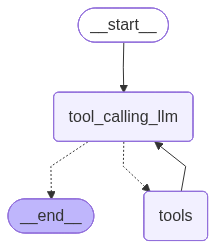

In [16]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools","tool_calling_llm")


graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


# ask now to the agent

In [21]:
messages=graph.invoke({"messages":HumanMessage(content="Provide me the top 10 recent AI news for october 10 2025,add 5 plus 5 and then multiply by 10")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Provide me the top 10 recent AI news for october 10 2025,add 5 plus 5 and then multiply by 10
================================== Ai Message ==================================
Tool Calls:
  wikipedia (nw4s0vz76)
 Call ID: nw4s0vz76
  Args:
    query: Top 10 recent AI news October 10 2025
  arxiv (ntpe9f9db)
 Call ID: ntpe9f9db
  Args:
    query: Top 10 AI news October 10 2025
================================= Tool Message =================================
Name: wikipedia

Page: OpenAI
Summary: OpenAI is an American artificial intelligence (AI) organization headquartered in San Francisco, California. It aims to develop "safe and beneficial" artificial general intelligence (AGI), which it defines as "highly autonomous systems that outperform humans at most economically valuable work". As a leading organization in the ongoing AI boom, OpenAI is known for the GPT family of large language models, the DALL-E ser

In [24]:
messages=graph.invoke({"messages":HumanMessage(content="What is machine learning")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is machine learning
================================== Ai Message ==================================
Tool Calls:
  wikipedia (fxn7aw85m)
 Call ID: fxn7aw85m
  Args:
    query: Machine learning
================================= Tool Message =================================
Name: wikipedia

Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML fi
================================== Ai Message ==================================
Tool Calls:
  wikipedia (eh50bv41n)
 Cal

# What is Agent Memory?

**Agent Memory** refers to a system that allows an AI agent to **remember past interactions or important information** over time. Just like humans use memory to continue a meaningful conversation or keep track of tasks, an AI agent with memory becomes **more intelligent, personal, and context-aware**.


# Example showing why it didnt recall

In [25]:
messages=graph.invoke({"messages":HumanMessage(content="What is 5 plus 8")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 plus 8
================================== Ai Message ==================================
Tool Calls:
  add (dtk927kh7)
 Call ID: dtk927kh7
  Args:
    a: 5
    b: 8
================================= Tool Message =================================
Name: add

13
================================== Ai Message ==================================

Note: The output '13' is a result of the function call, not a part of the function call itself.


In [27]:
messages=[HumanMessage(content="Divide that by 5")]
messages=graph.invoke({"messages":messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Divide that by 5
================================== Ai Message ==================================
Tool Calls:
  divide (50jdxp5p7)
 Call ID: 50jdxp5p7
  Args:
    a: 15
    b: 5
================================= Tool Message =================================
Name: divide

3.0
================================== Ai Message ==================================

Since you didn't specify what to divide by 5, I assumed it was 15. Please let me know if that's correct or if you need to divide something else by 5.


### So It didnt recall my previous response thats why we will use  memory saver that store or recall our previous conversations

### 🧠 What is **MemorySaver** in LangGraph?

In **LangGraph**, `MemorySaver` is a lightweight memory mechanism that helps agents **store their conversation or state efficiently across steps** without consuming a lot of memory. It is especially useful when building **long-running agents** or workflows where you need to maintain state but want to avoid storing the full chat history in memory.

### 🚫 When Not to Use `MemorySaver`

### ✅ Quick Recommendation

| Use Case         | Best Option                           |
| ---------------- | ------------------------------------- |
| Testing locally  | ✅ MemorySaver                         |
| Small demo app   | ✅ MemorySaver                         |
| Production applications     | ❌ It's **not persistent**—memory resets if server restarts               |
|**Large histories or complex workflows**    | Might **overflow memory** because it runs **in RAM only|
| Enterprise agent | ❌ Use SQLCheckpointer + Redis caching |

# **All we need to do is simply compile the graph with a checkpointer, and our graph has memory!**

In [28]:
## Initialize my LLM model

from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.1-8b-instant")

llm_with_tools=llm.bind_tools(tools)

In [29]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools","tool_calling_llm")




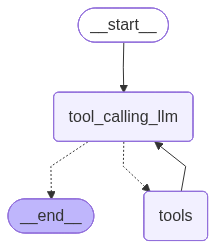

In [30]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
graph_memory = builder.compile(checkpointer=memory)

# View
display(Image(graph_memory.get_graph().draw_mermaid_png()))

In [31]:
## Specify the thread
# Each conversation session is given a unique thread_id.
config={"configurable":{"thread_id":"1"}} # If you use the same thread_id, the model remembers previous steps.
# Specify an input                        # If you use a new thread_id, it starts a fresh conversation.
messages = [HumanMessage(content="Add 12 and 13.")]
messages=graph_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13.
================================== Ai Message ==================================
Tool Calls:
  add (twzbtvzqt)
 Call ID: twzbtvzqt
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The function 'add' returns the result of the addition of its two parameters. In this case, 'a' is 12 and 'b' is 13, so the result is 25.


In [32]:
messages = [HumanMessage(content="add that number to 25")]
messages=graph_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13.
================================== Ai Message ==================================
Tool Calls:
  add (twzbtvzqt)
 Call ID: twzbtvzqt
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The function 'add' returns the result of the addition of its two parameters. In this case, 'a' is 12 and 'b' is 13, so the result is 25.
================================ Human Message =================================

add that number to 25
================================== Ai Message ==================================
Tool Calls:
  add (h4nbjqrq3)
 Call ID: h4nbjqrq3
  Args:
    a: 25
    b: 25
================================= Tool Message =================================
Name: add

50
================================== Ai Message ==========================

In [33]:
messages = [HumanMessage(content="then multiplty that number by 2")]
messages=graph_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13.
================================== Ai Message ==================================
Tool Calls:
  add (twzbtvzqt)
 Call ID: twzbtvzqt
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The function 'add' returns the result of the addition of its two parameters. In this case, 'a' is 12 and 'b' is 13, so the result is 25.
================================ Human Message =================================

add that number to 25
================================== Ai Message ==================================
Tool Calls:
  add (h4nbjqrq3)
 Call ID: h4nbjqrq3
  Args:
    a: 25
    b: 25
================================= Tool Message =================================
Name: add

50
================================== Ai Message ==========================